150
75
150
200
200
Removed no burn in
Removed no burn in
Removed no burn in


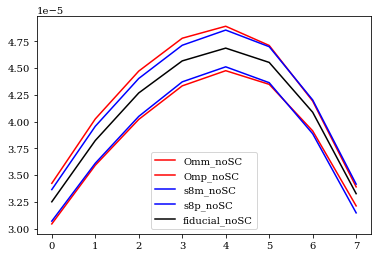

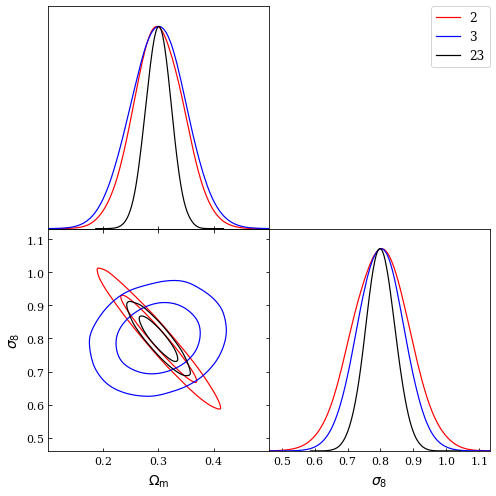

In [73]:
import glob
import os
from Moments_analysis import moments_map
import numpy as np
import gc
import pickle
import healpy as hp
import matplotlib.pyplot as plt
def covariance_jck(TOTAL_PHI,jk_r,type_cov):
  if type_cov=='jackknife':
      fact=(jk_r-1.)/(jk_r)

  elif type_cov=='bootstrap':
      fact=1./(jk_r)
  #  Covariance estimation

  average=np.zeros(TOTAL_PHI.shape[0])
  cov_jck=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  err_jck=np.zeros(TOTAL_PHI.shape[0])


  for kk in range(jk_r):
    average+=TOTAL_PHI[:,kk]
  average=average/(jk_r)

 # print average
  for ii in range(TOTAL_PHI.shape[0]):
     for jj in range(ii+1):
          for kk in range(jk_r):
            cov_jck[jj,ii]+=TOTAL_PHI[ii,kk]*TOTAL_PHI[jj,kk]

          cov_jck[jj,ii]=(-average[ii]*average[jj]*jk_r+cov_jck[jj,ii])*fact
          cov_jck[ii,jj]=cov_jck[jj,ii]

  for ii in range(TOTAL_PHI.shape[0]):
   err_jck[ii]=np.sqrt(cov_jck[ii,ii])
 # print err_jck

  #compute correlation
  corr=np.zeros((TOTAL_PHI.shape[0],TOTAL_PHI.shape[0]))
  for i in range(TOTAL_PHI.shape[0]):
      for j in range(TOTAL_PHI.shape[0]):
        corr[i,j]=cov_jck[i,j]/(np.sqrt(cov_jck[i,i]*cov_jck[j,j]))

  average=average*fact
  return {'cov' : cov_jck,
          'err' : err_jck,
          'corr':corr,
          'mean':average}

def save_obj(name, obj):
    
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=2)
        f.close()

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute
def read_m(u,SC_ = True):
    bins_2 = ['0_0'] #, '0_1', '0_2', '0_3', '1_1', '1_2', '1_3', '2_2', '2_3', '3_3']
    bins_3 = np.unique(['0_0_0', '0_0_1', '0_0_2', '0_0_3', '0_1_1', '0_1_2', '0_1_3', '0_2_2', '0_2_3', '0_3_3', '1_1_1', '1_1_2', '1_1_3', '1_2_2', '1_2_3', '1_3_3', '2_2_2', '2_2_3', '2_3_3', '3_3_3', '0_1_0', '0_2_0', '0_2_1', '0_3_0', '0_3_1', '0_3_2', '1_0_0', '1_0_1', '1_0_2', '1_0_3', '1_1_0', '1_2_0', '1_2_1', '1_3_0', '1_3_1', '1_3_2', '2_0_0', '2_0_1', '2_0_2', '2_0_3', '2_1_0', '2_1_1', '2_1_2', '2_1_3', '2_2_0', '2_2_1', '2_3_0', '2_3_1', '2_3_2', '3_0_0', '3_0_1', '3_0_2', '3_0_3', '3_1_0', '3_1_1', '3_1_2', '3_1_3', '3_2_0', '3_2_1', '3_2_2', '3_2_3', '3_3_0', '3_3_1', '3_3_2'])
    bins_3 = np.unique(['0_0_0']) #, '0_1_1', '0_1_2', '0_1_3', '0_2_2', '0_2_3', '0_3_3', '1_1_1', '1_1_2', '1_1_3', '1_2_2', '1_2_3', '1_3_3', '2_2_2', '2_2_3', '2_3_3', '3_3_3', '0_1_0', '0_2_0', '0_2_1', '0_3_0', '0_3_1', '0_3_2', '1_0_0', '1_0_1', '1_0_2', '1_0_3', '1_1_0', '1_2_0', '1_2_1', '1_3_0', '1_3_1', '1_3_2', '2_0_0', '2_0_1', '2_0_2', '2_0_3', '2_1_0', '2_1_1', '2_1_2', '2_1_3', '2_2_0', '2_2_1', '2_3_0', '2_3_1', '2_3_2', '3_0_0', '3_0_1', '3_0_2', '3_0_3', '3_1_0', '3_1_1', '3_1_2', '3_1_3', '3_2_0', '3_2_1', '3_2_2', '3_2_3', '3_3_0', '3_3_1', '3_3_2'])
    count = 0
 
    for b in bins_2:
        if count ==0:
            dv2 = u[0].moments['KK'][b] - u[0].moments['NN'][b]
        else:
            dv2 = np.hstack([dv2,u[0].moments['KK'][b] - u[0].moments['NN'][b]])
        count +=1

    count = 0
    for b in bins_3:
        #try:
            if count ==0:
                if SC_:
                    try:
                        dv3 = u[0].moments['KK'][b]-u[0].moments['KN'][b]
                    except:
                        # print ('failed ',
                         dv3 = u[0].moments['KK'][b]
                else:
                    dv3 = u[0].moments['KK'][b]#-u[0].moments['NK'][b]
            else:
                #try:
                    if SC_:
                        try:
                            dv3 = np.hstack([dv3,u[0].moments['KK'][b]-u[0].moments['KN'][b]])
                        except:
                            dv3 = np.hstack([dv3,u[0].moments['KK'][b]])#
                    else:
                        dv3 = np.hstack([dv3,u[0].moments['KK'][b]])#-u[0].moments['NK'][b]])
                #except:
                #    pass
        #except:
        #    pass
            count +=1


    return dv2,dv3



output = '/pscratch/sd/m/mgatti/fisher_/noSC/'
folder_base  = '//pscratch/sd/m/mgatti/fisher_/noSC//'
extra_ = ['Omm_noSC','Omp_noSC','s8m_noSC','s8p_noSC','fiducial_noSC'] #'Omm_noSC','Omp_noSC'
#extra_ = ['Omm_noSC','Omp_noSC','fiducial_noSC/'] #'Omm_noSC','Omp_noSC'
color = ['red','red','blue','blue', 'black']
sm = np.array([8.2,13.1,21.0,33.6,54.,86.,138,221.])
results_2 = dict()
results_23 = dict()
results_3 = dict()
for ii,extra in enumerate(extra_):
    #extra = 'cosmo_delta_Om_p/'
    #extra = 'cosmo_delta_s8_p/'
    #extra = 'cosmo_delta_s8_m/'
    #extra = 'cosmo_fiducial/'
    files = glob.glob(output+extra+'/*')

    dv2_ =[]
    #dv3_ =[]
    #for f in files:
    #    f_ = f.split('.pkl')[0]
    #    name = (f.split('.pkl')[0]).split(output+extra)[1]
    #    rot = np.int(name.split('_noise')[0].split('_')[-1])
    #    if rot<4:
    #        m = load_obj(f_)
    #        dv2,dv3  = read_m({0:m},SC_ = False)
    #        dv2_.append(dv2)
    #        dv3_.append(dv3)

    dv3a_ =[]
    for f in files:
        f_ = f.split('.pkl')[0]
        name = (f.split('.pkl')[0]).split(output+extra)[1]
        rot = np.int(name.split('_noise')[0].split('_')[-1])
        if rot<2:
            m = load_obj(f_)
            dv2,dv3  = read_m({0:m},SC_ = False)
            dv2_.append(dv2)
            dv3a_.append(dv3)
            
            
    print (len(dv2_))
    results_2[extra] = np.mean(np.array(dv2_),axis=0)
    results_23[extra] = np.hstack([np.mean(np.array(dv2_),axis=0),np.mean(np.array(dv3a_),axis=0)])
    results_3[extra] = np.mean(np.array(dv3a_),axis=0)
    plt.plot(np.mean(dv2_,axis=0)*sm,label=extra,color = color[ii])
plt.legend()



cov2 = covariance_jck(np.array(dv2_).T,200,'bootstrap')
cov3 = covariance_jck(np.array(dv3a_).T,200,'bootstrap')
cov23 = covariance_jck(np.hstack([np.array(dv2_),np.array(dv3a_)]).T,200,'bootstrap')



# initialise fisher matrix
F = np.zeros((2,2))
# inverse measurement covariance
P = np.linalg.inv(cov2['cov'])
# derivatives of the datavector
results = dict()
d_xi_ds8 = (results_2['s8p_noSC']-results_2['s8m_noSC'])/0.03
d_xi_dom = (results_2['Omp_noSC']-results_2['Omm_noSC'])/0.02
F[1,1] = np.matmul(d_xi_ds8,np.matmul(P,d_xi_ds8)) 
F[0,0] = np.matmul(d_xi_dom,np.matmul(P,d_xi_dom)) 
F[0,1] = F[1,0] =  0.5*(np.matmul(d_xi_dom,np.matmul(P,d_xi_ds8)) +np.matmul(d_xi_ds8,np.matmul(P,d_xi_dom)) )
C_par_2 = np.linalg.inv(F)
results['2'] = C_par_2

P = np.linalg.inv(cov3['cov'])
# derivatives of the datavector
d_xi_ds8 = (results_3['s8p_noSC']-results_3['s8m_noSC'])/0.03
d_xi_dom = (results_3['Omp_noSC']-results_3['Omm_noSC'])/0.02
F[1,1] = np.matmul(d_xi_ds8,np.matmul(P,d_xi_ds8)) 
F[0,0] = np.matmul(d_xi_dom,np.matmul(P,d_xi_dom)) 
F[0,1] = F[1,0] =  0.5*(np.matmul(d_xi_dom,np.matmul(P,d_xi_ds8)) +np.matmul(d_xi_ds8,np.matmul(P,d_xi_dom)) )
C_par_3= np.linalg.inv(F)
results['3'] = C_par_3

P = np.linalg.inv(cov23['cov'])
# derivatives of the datavector
d_xi_ds8 = (results_23['s8p_noSC']-results_23['s8m_noSC'])/0.03
d_xi_dom = (results_23['Omp_noSC']-results_23['Omm_noSC'])/0.02
F[1,1] = np.matmul(d_xi_ds8,np.matmul(P,d_xi_ds8)) 
F[0,0] = np.matmul(d_xi_dom,np.matmul(P,d_xi_dom)) 
F[0,1] = F[1,0] =  0.5*(np.matmul(d_xi_dom,np.matmul(P,d_xi_ds8)) +np.matmul(d_xi_ds8,np.matmul(P,d_xi_dom)) )
C_par_23= np.linalg.inv(F)
results['23'] = C_par_23





import pylab as mplot
mplot.rc('text', usetex=False)
mplot.rc('font', family='serif')
import getdist
from getdist.gaussian_mixtures import GaussianND
from getdist import plots, MCSamples
import copy


chains_ = []
cases = results.keys()
for case in results.keys():
    #imagine you have multiple cases (different DV with different choices of scales)
    mean = [0.3, 0.8]
    C_par = results[case]

    x = np.random.multivariate_normal(np.array(mean),C_par,30000)
    sig8_ = np.array(x[:,1]).astype(np.float)
    om_ = np.array(x[:,0]).astype(np.float)       


    ssa = np.c_[om_.T,sig8_.T]
    samples_ = MCSamples(samples=ssa,weights=np.ones(30000), names = ['Om','sigma8'], labels = [r'\Omega_{\rm m}','\sigma_8'])

    chains_.append(samples_)     

    
g = plots.getSubplotPlotter(width_inch=7)



g.triangle_plot(chains_,['Om','sigma8'],filled=[False,False,False,False,False,False,True,True,True],legend_labels=cases,  contour_lws=[1.2,1.2,1.2,1.2,1.2,1.,1.],
                legend_loc='upper right',colors=['red','blue','black','black','black'],
                contour_ls =['-','-','-','-.','-'],contour_colors=['red','blue','black','black','black'],param_limits={'Om': [0.1,0.5], 
                       's8': [0.6,1.0]})

In [69]:
output = '/pscratch/sd/m/mgatti/fisher_/SC/'
folder_base  = '//pscratch/sd/m/mgatti/fisher_/SC//'
extra_ = ['fiducial_SC'] #'Omm_noSC','Omp_noSC'
#extra_ = ['Omm_noSC','Omp_noSC','fiducial_noSC/'] #'Omm_noSC','Omp_noSC'
color = ['red','red','blue','blue', 'black']
sm = np.array([8.2,13.1,21.0,33.6,54.,86.,138,221.])
shifted_results_2 = dict()
shifted_results_23 = dict()
shifted_results_3 = dict()
for ii,extra in enumerate(extra_):
    #extra = 'cosmo_delta_Om_p/'
    #extra = 'cosmo_delta_s8_p/'
    #extra = 'cosmo_delta_s8_m/'
    #extra = 'cosmo_fiducial/'
    files = glob.glob(output+extra+'/*')

    dv2_ =[]
    #dv3_ =[]
    #for f in files:
    #    f_ = f.split('.pkl')[0]
    #    name = (f.split('.pkl')[0]).split(output+extra)[1]
    #    rot = np.int(name.split('_noise')[0].split('_')[-1])
    #    if rot<4:
    #        m = load_obj(f_)
    #        dv2,dv3  = read_m({0:m},SC_ = False)
    #        dv2_.append(dv2)
    #        dv3_.append(dv3)

    dv3a_ =[]
    for f in files:
        f_ = f.split('.pkl')[0]
        name = (f.split('.pkl')[0]).split(output+extra)[1]
        rot = np.int(name.split('_noise')[0].split('_')[-1])
        if rot<2:
            m = load_obj(f_)
            dv2,dv3  = read_m({0:m},SC_ = False)
            dv2_.append(dv2)
            dv3a_.append(dv3)
            
            
   # print (len(dv2_))
    shifted_results_2[extra] = np.mean(np.array(dv2_),axis=0)
    shifted_results_23[extra] = np.hstack([np.mean(np.array(dv2_),axis=0),np.mean(np.array(dv3a_),axis=0)])
    shifted_results_3[extra] = np.mean(np.array(dv3a_),axis=0)


In [70]:
results_23.keys()

dict_keys(['Omm_noSC', 'Omp_noSC', 's8m_noSC', 's8p_noSC', 'fiducial_noSC'])

In [71]:
shift = dict()
P = np.linalg.inv(cov23['cov'])
# derivatives of the datavector
d_xi_ds8 = (results_23['s8p_noSC']-results_23['s8m_noSC'])/0.03
d_xi_dom = (results_23['Omp_noSC']-results_23['Omm_noSC'])/0.02
delta_xi_ds8 = (shifted_results_23['fiducial_SC']-results_23['fiducial_noSC'])
delta_xi_dom = (shifted_results_23['fiducial_SC']-results_23['fiducial_noSC'])

c1 = np.matmul(d_xi_ds8,np.matmul(P,delta_xi_dom))
c0 = np.matmul(d_xi_dom,np.matmul(P,delta_xi_dom))
shift['23'] =  (np.matmul(np.array([c0,c1]),results['23']))



P = np.linalg.inv(cov2['cov'])
# derivatives of the datavector
d_xi_ds8 = (results_2['s8p_noSC']-results_2['s8m_noSC'])/0.03
d_xi_dom = (results_2['Omp_noSC']-results_2['Omm_noSC'])/0.02
delta_xi_ds8 = (shifted_results_2['fiducial_SC']-results_2['fiducial_noSC'])
delta_xi_dom = (shifted_results_2['fiducial_SC']-results_2['fiducial_noSC'])

c1 = np.matmul(d_xi_ds8,np.matmul(P,delta_xi_dom))
c0 = np.matmul(d_xi_dom,np.matmul(P,delta_xi_dom))
shift['2']=  (np.matmul(np.array([c0,c1]),results['2']))



P = np.linalg.inv(cov3['cov'])
# derivatives of the datavector
d_xi_ds8 = (results_3['s8p_noSC']-results_3['s8m_noSC'])/0.03
d_xi_dom = (results_3['Omp_noSC']-results_3['Omm_noSC'])/0.02
delta_xi_ds8 = (shifted_results_3['fiducial_SC']-results_3['fiducial_noSC'])
delta_xi_dom = (shifted_results_3['fiducial_SC']-results_3['fiducial_noSC'])

c1 = np.matmul(d_xi_ds8,np.matmul(P,delta_xi_dom))
c0 = np.matmul(d_xi_dom,np.matmul(P,delta_xi_dom))
shift['3'] =  (np.matmul(np.array([c0,c1]),results['3']))



2
Removed no burn in
Removed no burn in


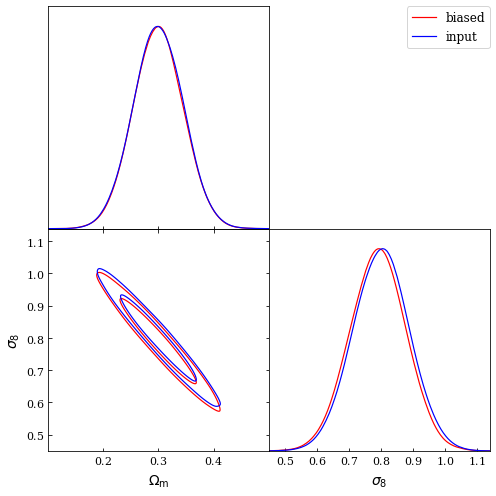

3
Removed no burn in
Removed no burn in


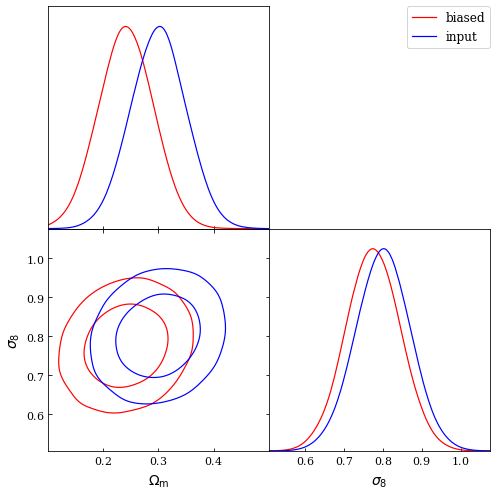

23
Removed no burn in
Removed no burn in


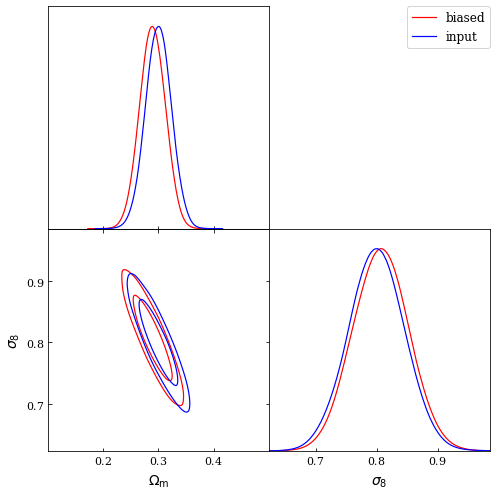

In [74]:


cases = results.keys()
for case in results.keys():
    print (case)
    chains_ = []
    #imagine you have multiple cases (different DV with different choices of scales)
    mean = [0.3, 0.8]+shift[case]
    C_par = results[case]

    x = np.random.multivariate_normal(np.array(mean),C_par,30000)
    sig8_ = np.array(x[:,1]).astype(np.float)
    om_ = np.array(x[:,0]).astype(np.float)       


    ssa = np.c_[om_.T,sig8_.T]
    samples_ = MCSamples(samples=ssa,weights=np.ones(30000), names = ['Om','sigma8'], labels = [r'\Omega_{\rm m}','\sigma_8'])

    chains_.append(samples_)     

    
    
    

    #imagine you have multiple cases (different DV with different choices of scales)
    mean = np.array([0.3, 0.8])
    C_par = results[case]

    x = np.random.multivariate_normal(np.array(mean),C_par,30000)
    sig8_ = np.array(x[:,1]).astype(np.float)
    om_ = np.array(x[:,0]).astype(np.float)       


    ssa = np.c_[om_.T,sig8_.T]
    samples_ = MCSamples(samples=ssa,weights=np.ones(30000), names = ['Om','sigma8'], labels = [r'\Omega_{\rm m}','\sigma_8'])

    chains_.append(samples_)   
    
    
    g = plots.getSubplotPlotter(width_inch=7)



    g.triangle_plot(chains_,['Om','sigma8'],filled=[False,False,False,False,False,False,True,True,True],legend_labels=['biased','input'],  contour_lws=[1.2,1.2,1.2,1.2,1.2,1.,1.],
                    legend_loc='upper right',colors=['red','blue','black','black','black'],
                    contour_ls =['-','-','-','-.','-'],contour_colors=['red','blue','black','black','black'],param_limits={'Om': [0.1,0.5], 
                           's8': [0.6,1.0]})
    plt.show()